In [1]:
import plotly
plotly.offline.init_notebook_mode()
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/ml_clean_data.csv'

In [3]:
ml_data = pd.read_csv(raw_data_url)

In [4]:
ml_data.head(n=5)

age  fnlwght  education_num_yr  cap_gain  cap_loss  hours_per_week  \
0   39    77516                13      2174         0              40   
1   50    83311                13         0         0              13   
2   38   215646                 9         0         0              40   
3   53   234721                 7         0         0              40   
4   28   338409                13         0         0              40   

   income_outcome  workclass_Federal-gov  workclass_Local-gov  \
0               0                      0                    0   
1               0                      0                    0   
2               0                      0                    0   
3               0                      0                    0   
4               0                      0                    0   

   workclass_Private  ...  level_of_employ_PT  education_level_ASC  \
0                  0  ...                   0                    0   
1                  0  ...                   1                    0   
2                  1  ...                   0                    0   
3                  1  ...                   0                    0   
4                  1  ...                   0                    0   

   education_level_CGRAD  education_level_HS  education_level_HSGRAD  \
0                      1                   0                       0   
1                      1                   0                       0   
2                      0                   0                       1   
3                      0                   1                       0   
4                      1                   0                       0   

   education_level_PGRAD  education_level_PRIM  education_level_SC  \
0                      0                     0                   0   
1                      0                     0                   0   
2                      0                     0                   0   
3                      0                     0                   0   
4                      0                     0                   0   

   marital_stat_Married  marital_stat_Unmarried  
0                     0                       1  
1                     1                       0  
2                     0                       1  
3                     1                       0  
4                     1                       0  

[5 rows x 49 columns]

In [5]:
ml_data.dtypes

age                             int64
fnlwght                         int64
education_num_yr                int64
cap_gain                        int64
cap_loss                        int64
hours_per_week                  int64
income_outcome                  int64
workclass_Federal-gov           int64
workclass_Local-gov             int64
workclass_Private               int64
workclass_Self-emp-inc          int64
workclass_Self-emp-not-inc      int64
workclass_State-gov             int64
workclass_Without-pay           int64
occupation_Adm-clerical         int64
occupation_Armed-Forces         int64
occupation_Craft-repair         int64
occupation_Exec-managerial      int64
occupation_Farming-fishing      int64
occupation_Handlers-cleaners    int64
occupation_Machine-op-inspct    int64
occupation_Other-service        int64
occupation_Priv-house-serv      int64
occupation_Prof-specialty       int64
occupation_Protective-serv      int64
occupation_Sales                int64
occupation_T

In [6]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           30072 non-null  int64
 1   fnlwght                       30072 non-null  int64
 2   education_num_yr              30072 non-null  int64
 3   cap_gain                      30072 non-null  int64
 4   cap_loss                      30072 non-null  int64
 5   hours_per_week                30072 non-null  int64
 6   income_outcome                30072 non-null  int64
 7   workclass_Federal-gov         30072 non-null  int64
 8   workclass_Local-gov           30072 non-null  int64
 9   workclass_Private             30072 non-null  int64
 10  workclass_Self-emp-inc        30072 non-null  int64
 11  workclass_Self-emp-not-inc    30072 non-null  int64
 12  workclass_State-gov           30072 non-null  int64
 13  workclass_Without-pay         3

In [7]:
ml_df = ml_data.copy()

In [8]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
from sklearn.model_selection import ShuffleSplit
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


ML_std_clf = StandardScaler()
#removed some redundant dummy variables
if 'income_outcome' in ml_df:
    y = ml_df['income_outcome'].values 
    del ml_df['income_outcome'] 
    X = ml_df.values 
    

if 'level_of_employ_PT' in ml_df:
    del ml_df['level_of_employ_PT'] 
    X = ml_df.values 
    
if 'sex_Female' in ml_df:
    del ml_df['sex_Female'] 
    X = ml_df.values 
    
if 'origin_descent_us_0' in ml_df:
    del ml_df['origin_descent_us_0'] 
    X = ml_df.values 

if 'marital_stat_Unmarried' in ml_df:
    del ml_df['marital_stat_Unmarried'] 
    X = ml_df.values 




num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


====Iteration 0  ====

Accuracy:  0.8485453034081463 

Confusion Matrix: 
      0    1
0  4165  339
1   572  939 

====Iteration 1  ====

Accuracy:  0.8452202826267664 

Confusion Matrix: 
      0    1
0  4206  349
1   582  878 

====Iteration 2  ====

Accuracy:  0.8467165419783874 

Confusion Matrix: 
      0    1
0  4181  314
1   608  912 



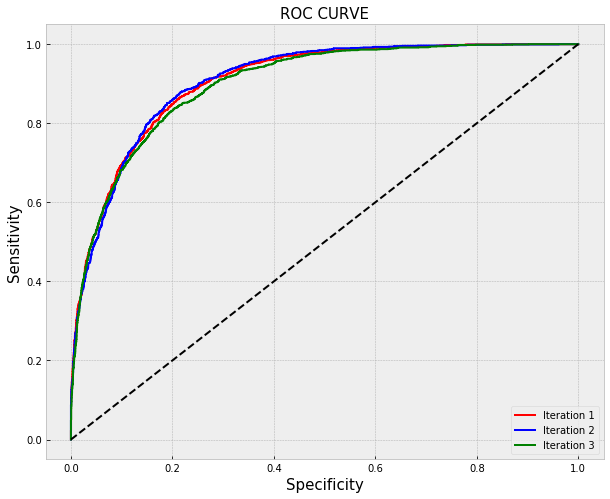

In [9]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import roc_auc_score, roc_curve

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)


lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' )
lr_clf_pipe = make_pipeline(StandardScaler(),lr_clf)


iter_num=0
weights = []

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf_pipe.fit(X_train,y_train)
    y_hat = lr_clf_pipe.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("Confusion Matrix: ")
    print (pd.DataFrame(conf),"\n")
    
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])

    
    
    prob = lr_clf_pipe.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
weights = np.array(weights)

In [10]:
weights

array([[ 0.3964811 ,  0.06941821,  0.91349176,  2.29501158,  0.26664408,
         0.26576859,  0.10007756, -0.01436675,  0.03324885,  0.05529324,
        -0.08782475, -0.0616454 , -0.11411505, -0.01118446, -0.01801148,
        -0.01099864,  0.24381094, -0.1939615 , -0.13780247, -0.09353308,
        -0.24652596, -0.21293558,  0.16808854,  0.0679828 ,  0.07078081,
         0.11455422, -0.03350248,  0.48557235, -0.20267259, -0.13525529,
        -0.52909426, -0.13819575,  0.49228469,  0.39362684,  0.05952927,
         0.22031996, -0.06363525, -0.08405617,  0.06711837,  0.03631062,
        -0.0654178 ,  0.09779551,  0.02921799,  0.23510744],
       [ 0.38135072,  0.07690137,  0.95947175,  2.29527903,  0.25893319,
         0.26117522,  0.07794902, -0.02358634,  0.03310945,  0.07597577,
        -0.08938395, -0.04330714, -0.12937569, -0.03384761, -0.00966976,
         0.007334  ,  0.26215101, -0.17303433, -0.17683572, -0.07889444,
        -0.26707825, -0.21977328,  0.15933818,  0.07467516,  0.

In [11]:


error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ml_df.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}
plotly.offline.iplot(fig)

Let's select the important variables from above and look at education_num_yr, cap_gain, and the levels of marital status 

In [12]:
Xnew = ml_df[['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male']].values

weights = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}

plotly.offline.iplot(fig)

====Iteration 0  ====

Accuracy:  0.8324189526184539 

Confusion Matrix: 
      0    1
0  4173  329
1   679  834 

====Iteration 1  ====

Accuracy:  0.8345802161263508 

Confusion Matrix: 
      0    1
0  4216  298
1   697  804 

====Iteration 2  ====

Accuracy:  0.8395677472984207 

Confusion Matrix: 
      0    1
0  4262  281
1   684  788 



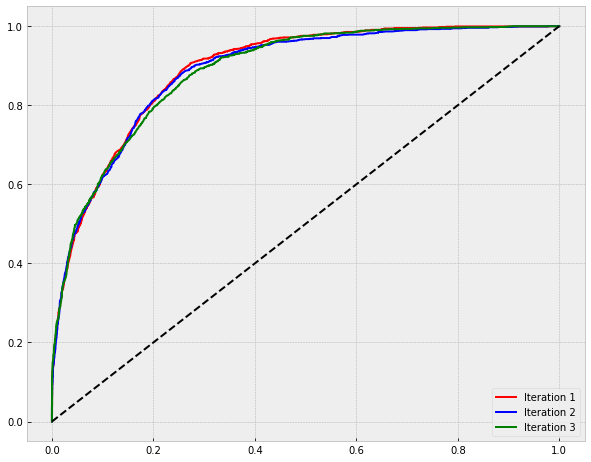

In [13]:
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    y_hat = lr_clf_pipe.predict(Xnew[test_indices])


    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("Confusion Matrix: ")
    print (pd.DataFrame(conf),"\n")
    
    prob = lr_clf_pipe.predict_proba(Xnew[test_indices])
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y[test_indices], prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
    

In [14]:
for train_indices, test_indices in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
ML_std_clf.fit(X_train)
X_train_scaled = ML_std_clf.transform(X_train) 
X_test_scaled = ML_std_clf.transform(X_test) 

In [15]:

import time

t = time.process_time()

# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

elapsed_time = time.process_time() - t

print(elapsed_time)

accuracy: 0.8523690773067332
[[4234  300]
 [ 588  893]]
25.238959118


In [16]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(8517, 44)
(8517,)
[4264 4253]


[[ 0.18429749  0.04158615  0.65091387  1.79906403  0.18750141  0.15237251
   0.03645187 -0.01189444  0.02073987  0.07724204 -0.07191822 -0.03164816
  -0.00877507 -0.03778834  0.         -0.05704879  0.20209224 -0.13088785
  -0.0778923  -0.06119544 -0.13286211 -0.08586064  0.14640839  0.03808902
   0.01443104  0.09460953 -0.05226423  0.3618457  -0.22848573 -0.07746321
  -0.23939288 -0.14034104  0.29482144  0.16902952  0.03494838  0.1120984
  -0.05802752  0.00649483  0.08373377 -0.02339849 -0.02778005  0.1250935
  -0.03443387  0.12594754]]


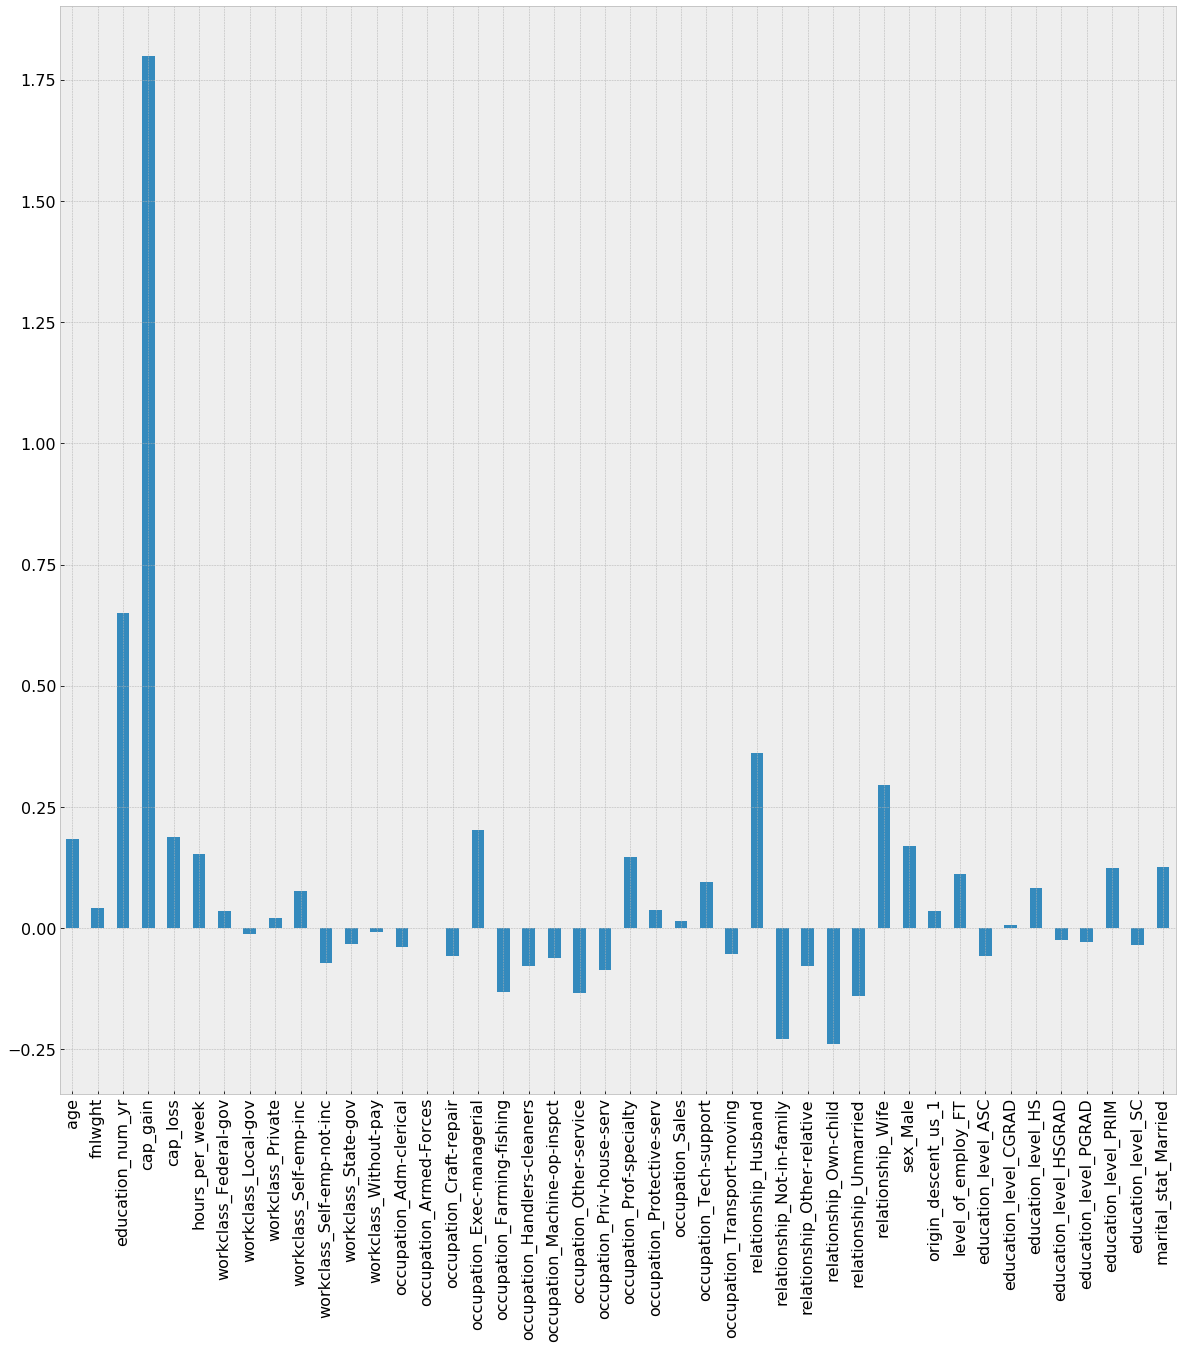

In [17]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=ml_df.columns)
weights.plot(kind='bar',figsize=(20,20), fontsize=16)

In [18]:
df_tested_on = ml_df.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['income_outcome'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
ml_df['income_outcome'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8517 entries, 25316 to 14930
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           8517 non-null   int64
 1   fnlwght                       8517 non-null   int64
 2   education_num_yr              8517 non-null   int64
 3   cap_gain                      8517 non-null   int64
 4   cap_loss                      8517 non-null   int64
 5   hours_per_week                8517 non-null   int64
 6   workclass_Federal-gov         8517 non-null   int64
 7   workclass_Local-gov           8517 non-null   int64
 8   workclass_Private             8517 non-null   int64
 9   workclass_Self-emp-inc        8517 non-null   int64
 10  workclass_Self-emp-not-inc    8517 non-null   int64
 11  workclass_State-gov           8517 non-null   int64
 12  workclass_Without-pay         8517 non-null   int64
 13  occupation_Adm-clerical     

/home/andrew/anaconda3/envs/r_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/home/andrew/anaconda3/envs/r_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 720x288 with 0 Axes>

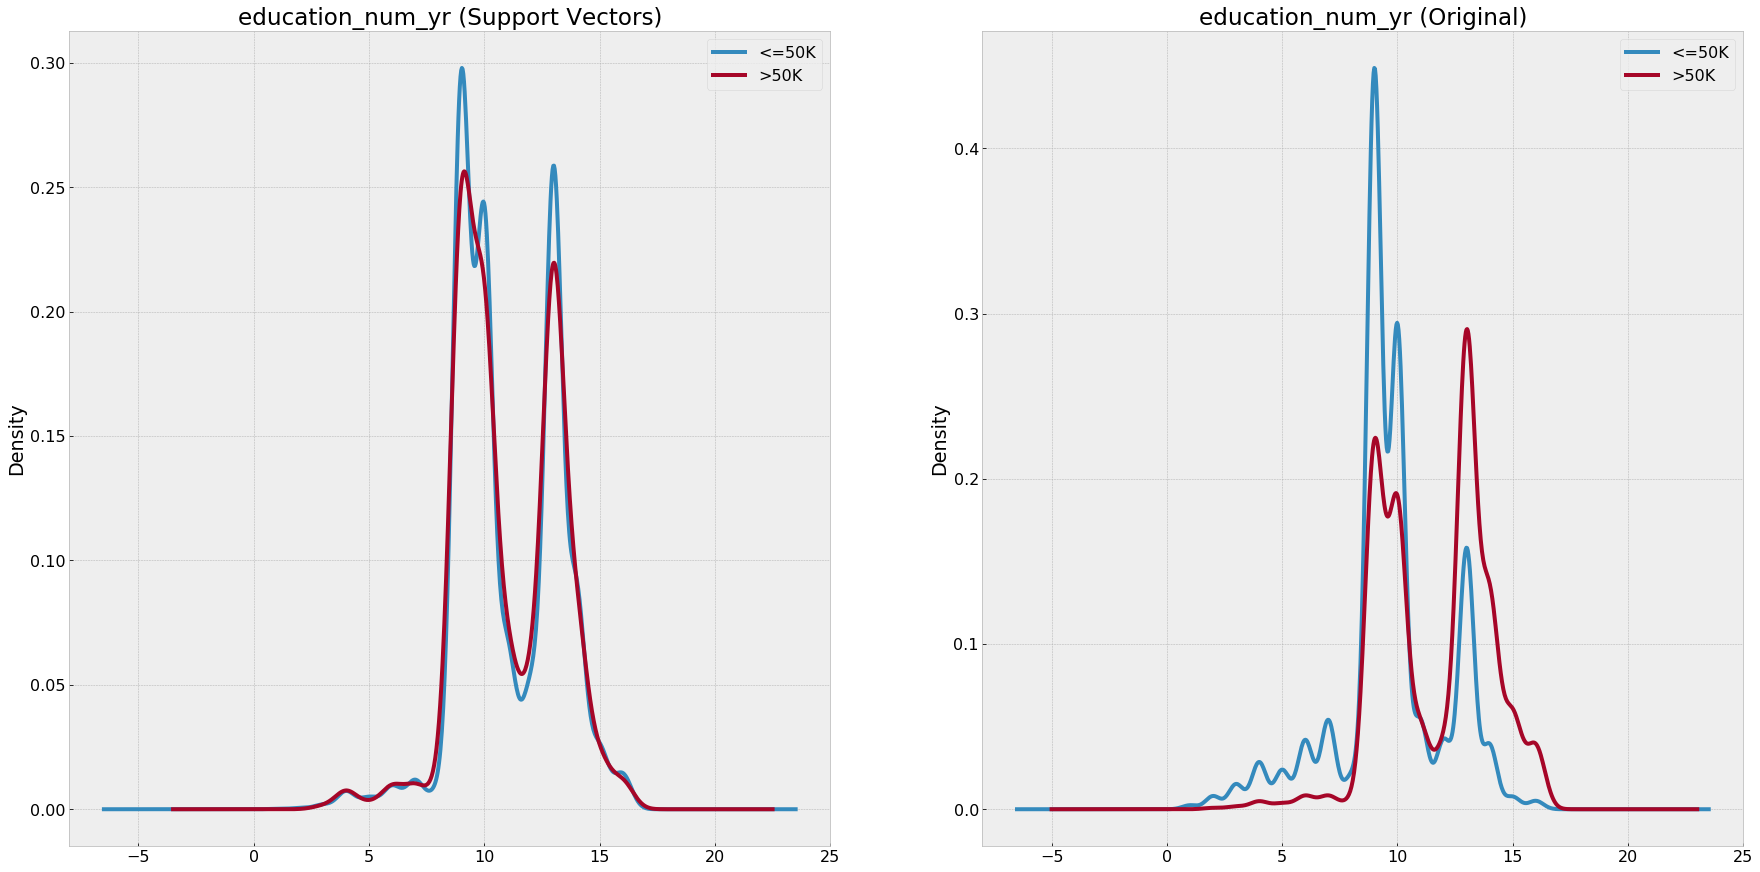

<Figure size 720x288 with 0 Axes>

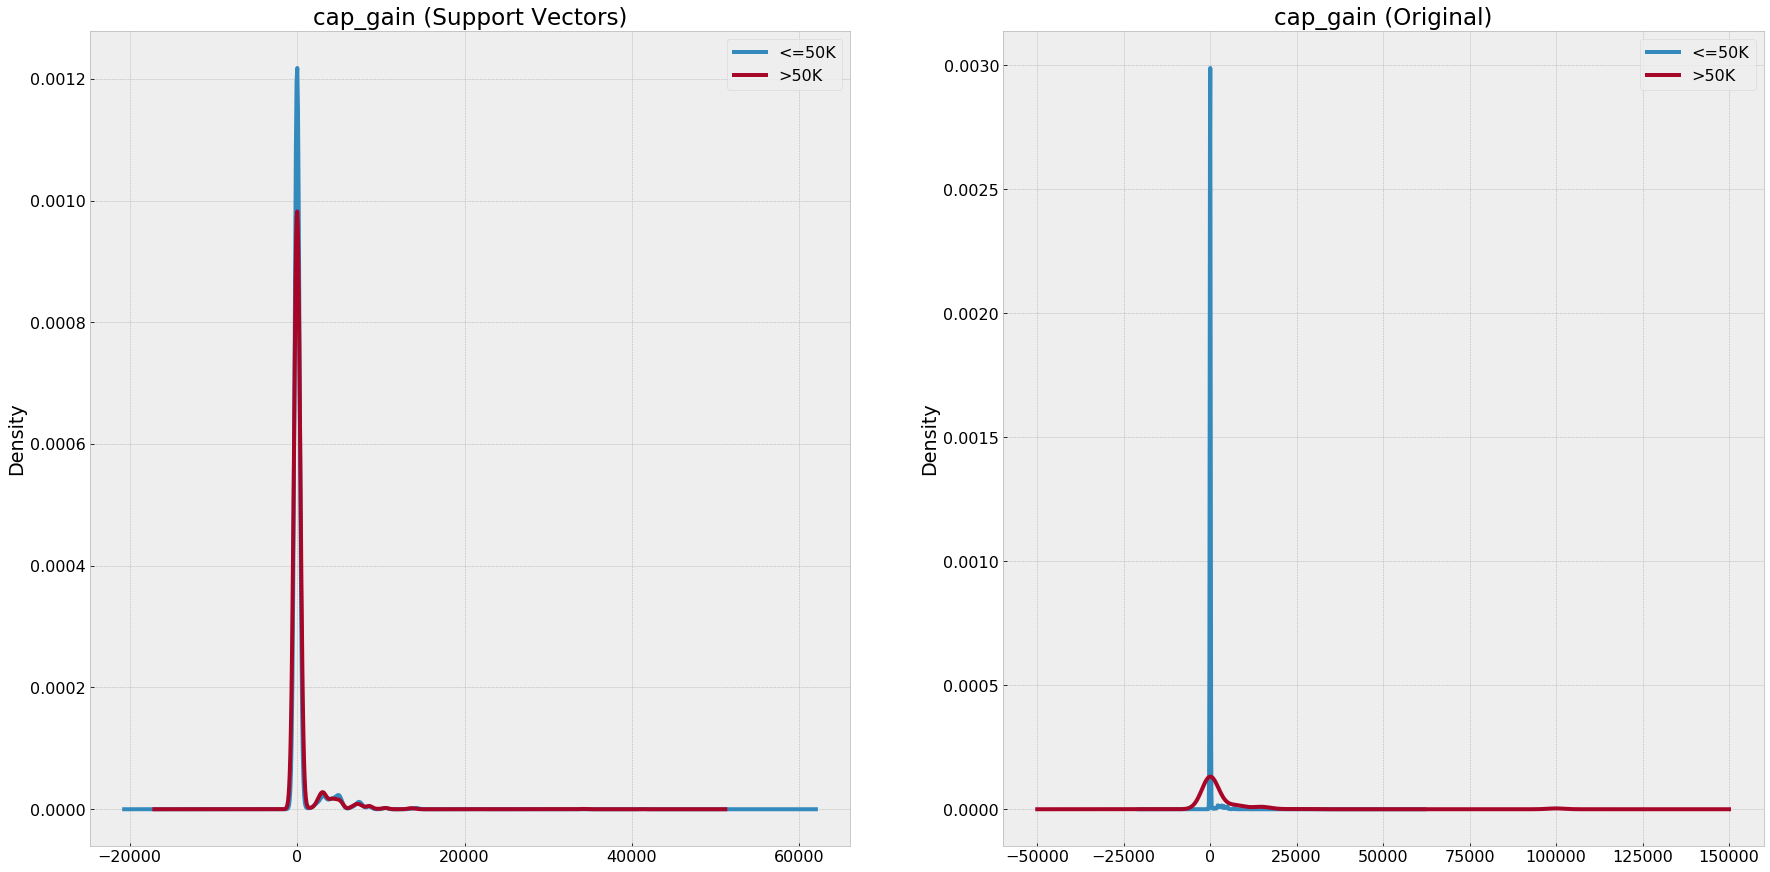

<Figure size 720x288 with 0 Axes>

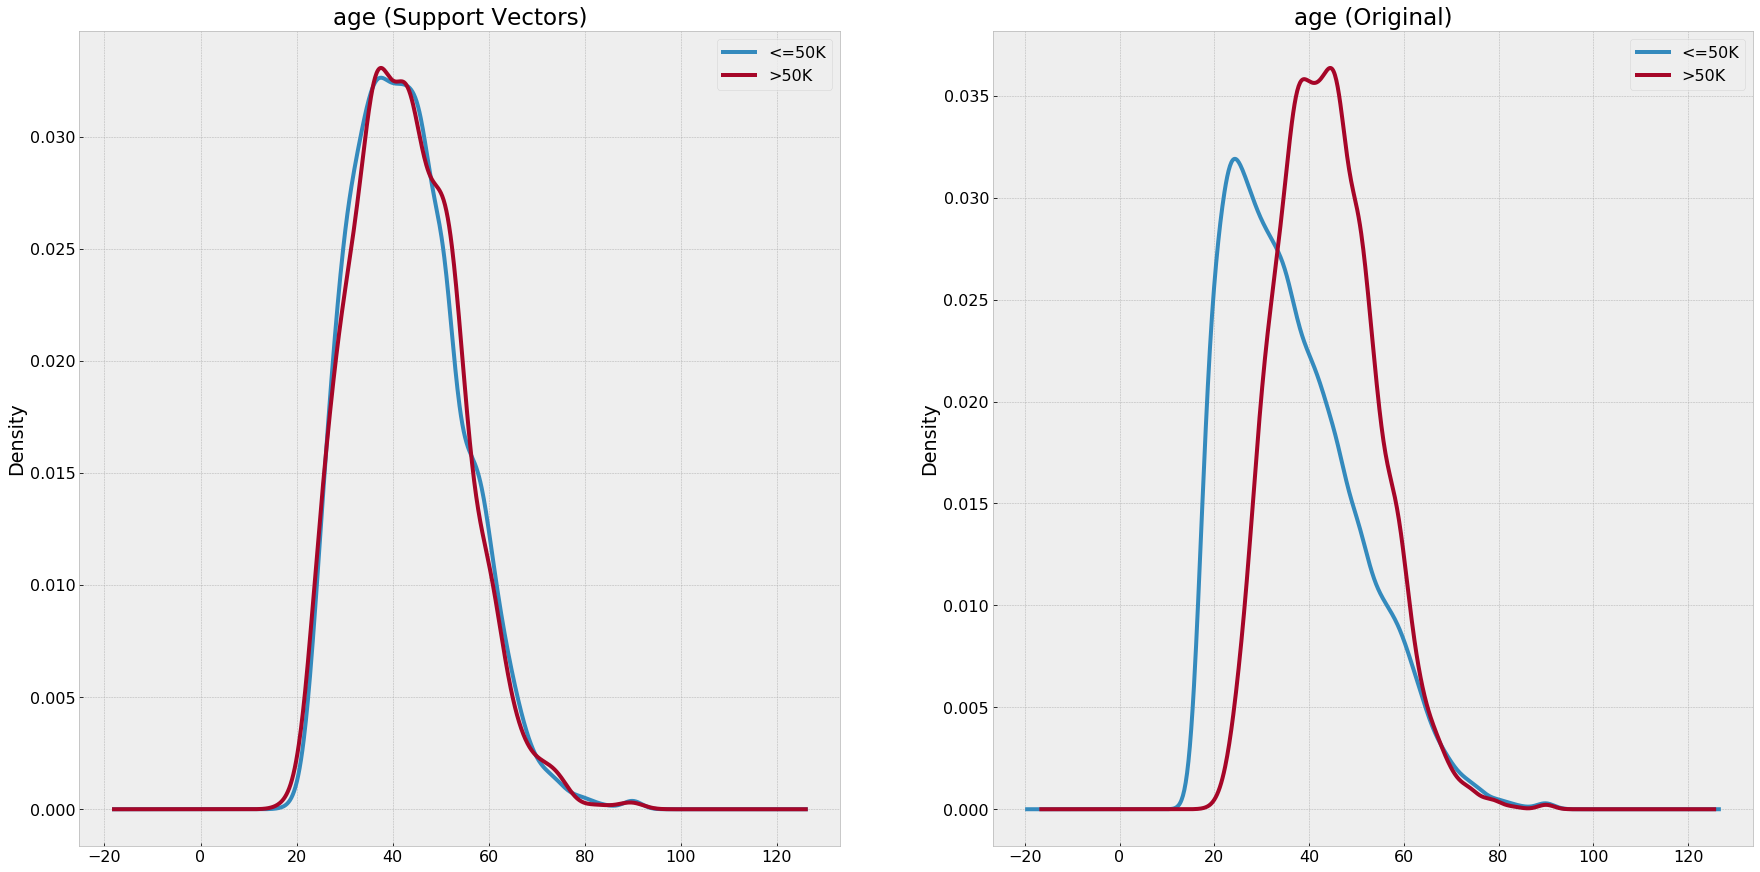

<Figure size 720x288 with 0 Axes>

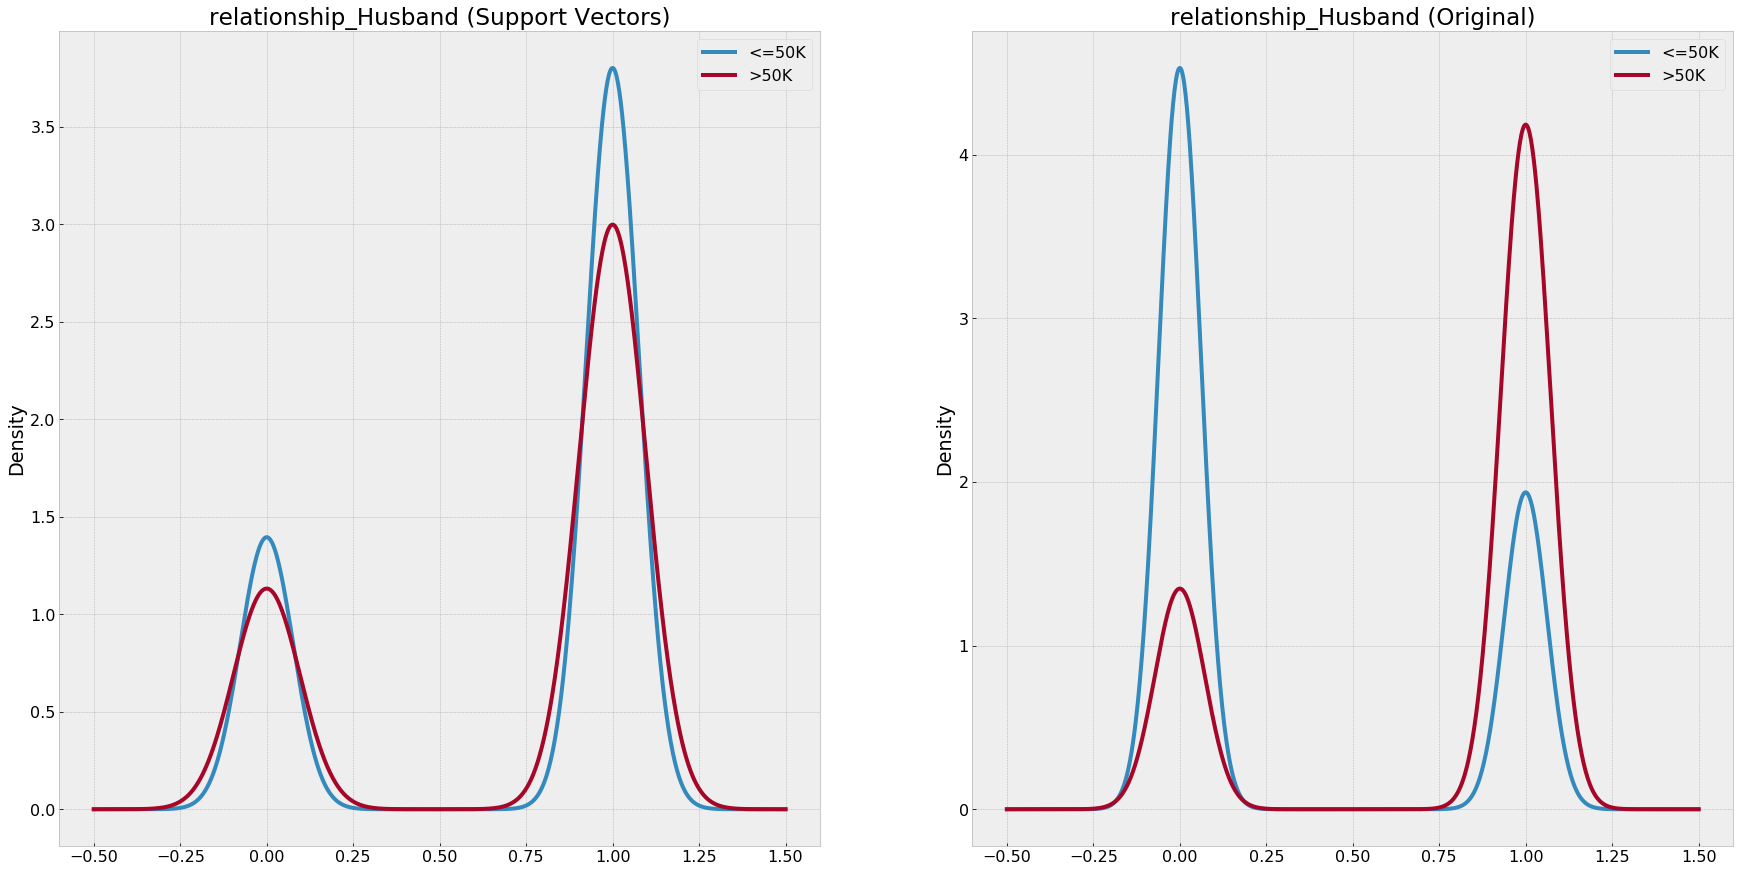

<Figure size 720x288 with 0 Axes>

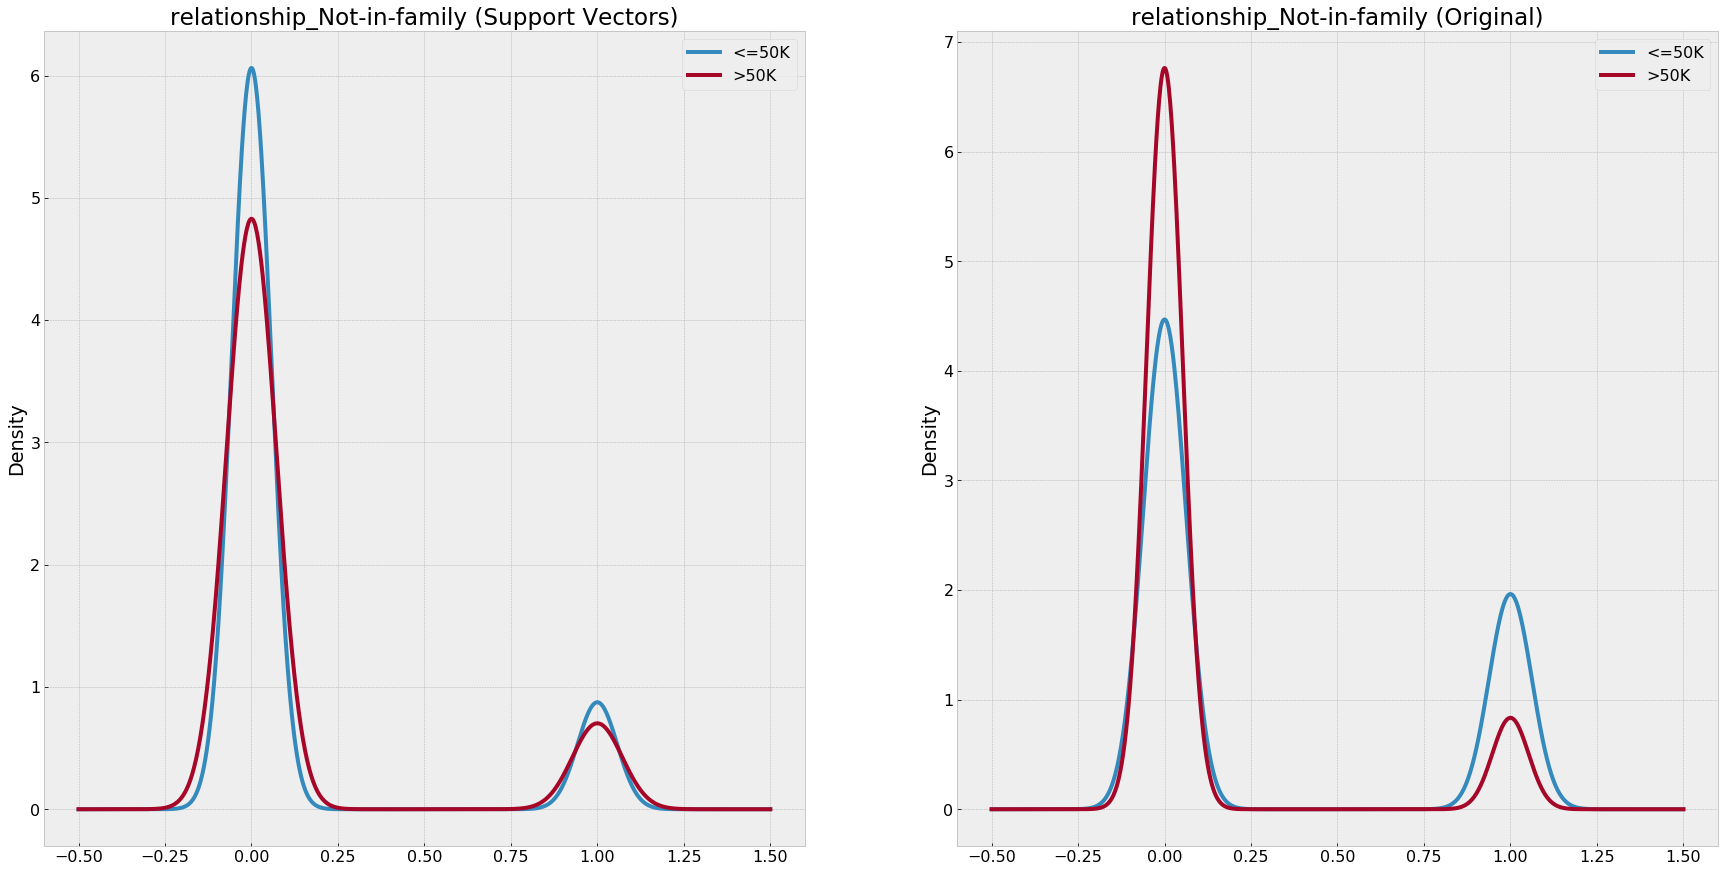

<Figure size 720x288 with 0 Axes>

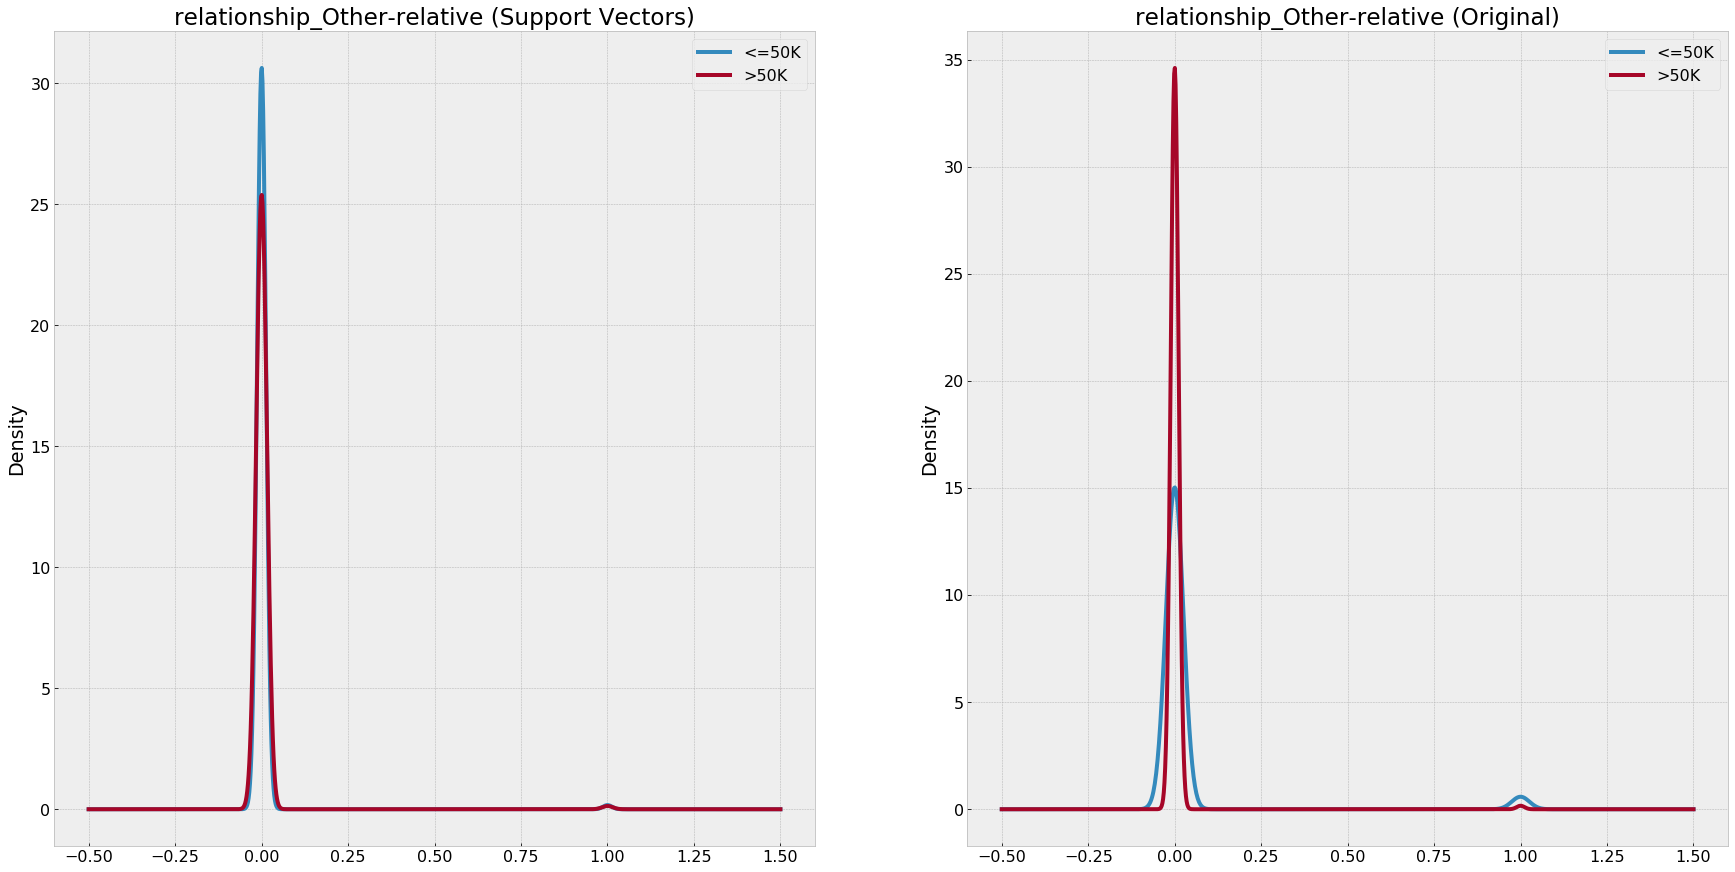

<Figure size 720x288 with 0 Axes>

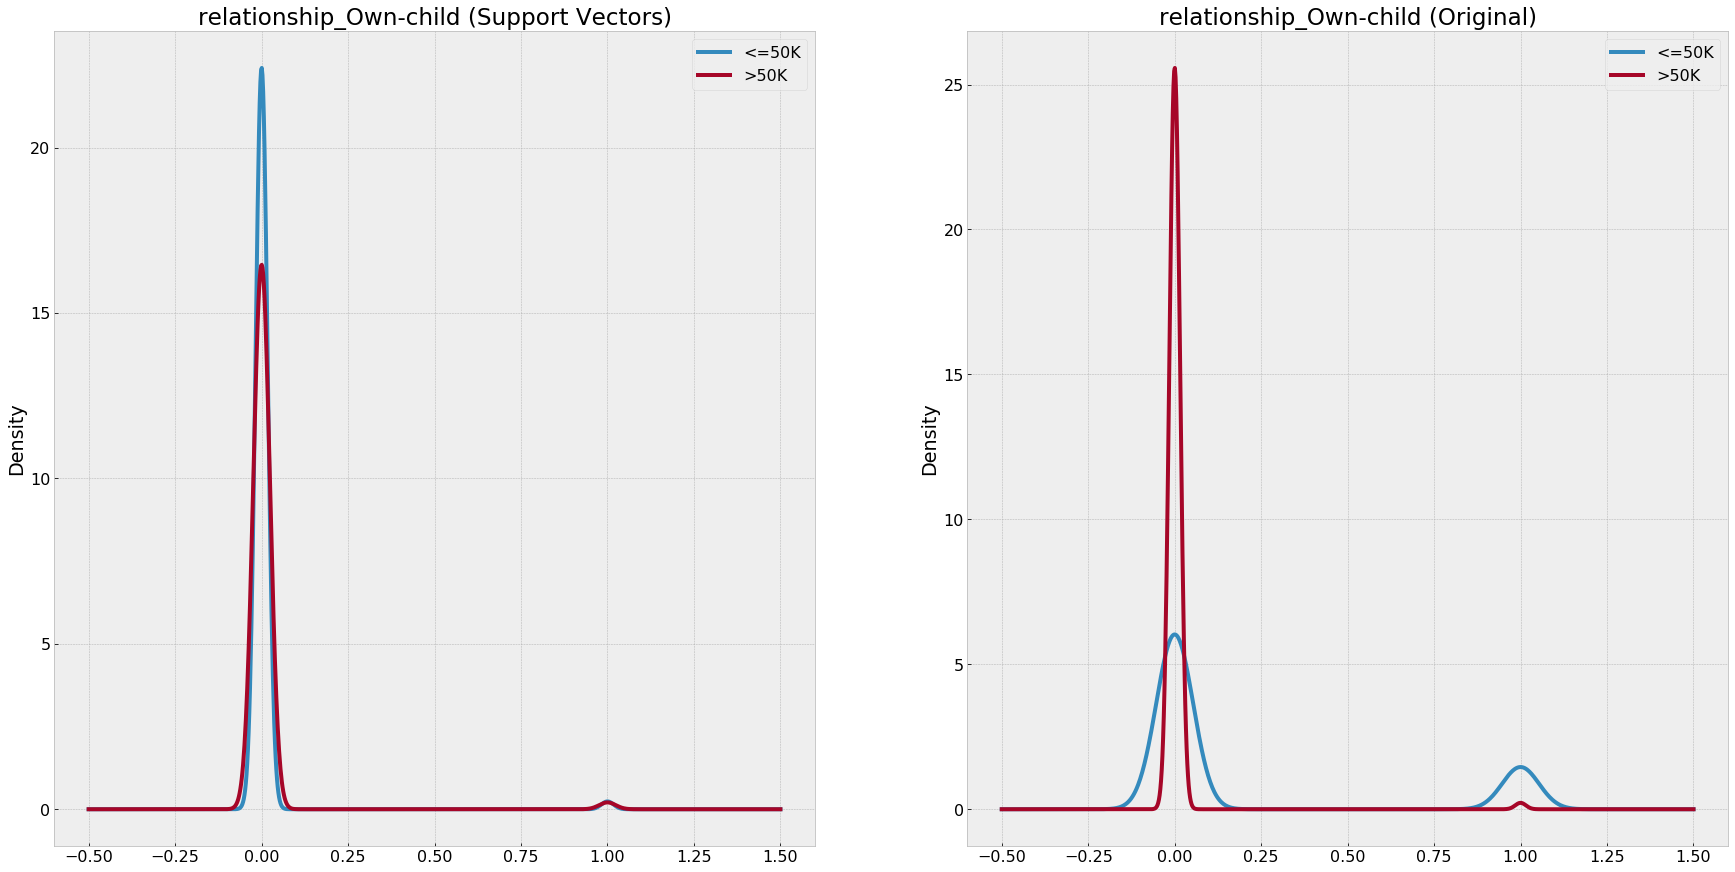

<Figure size 720x288 with 0 Axes>

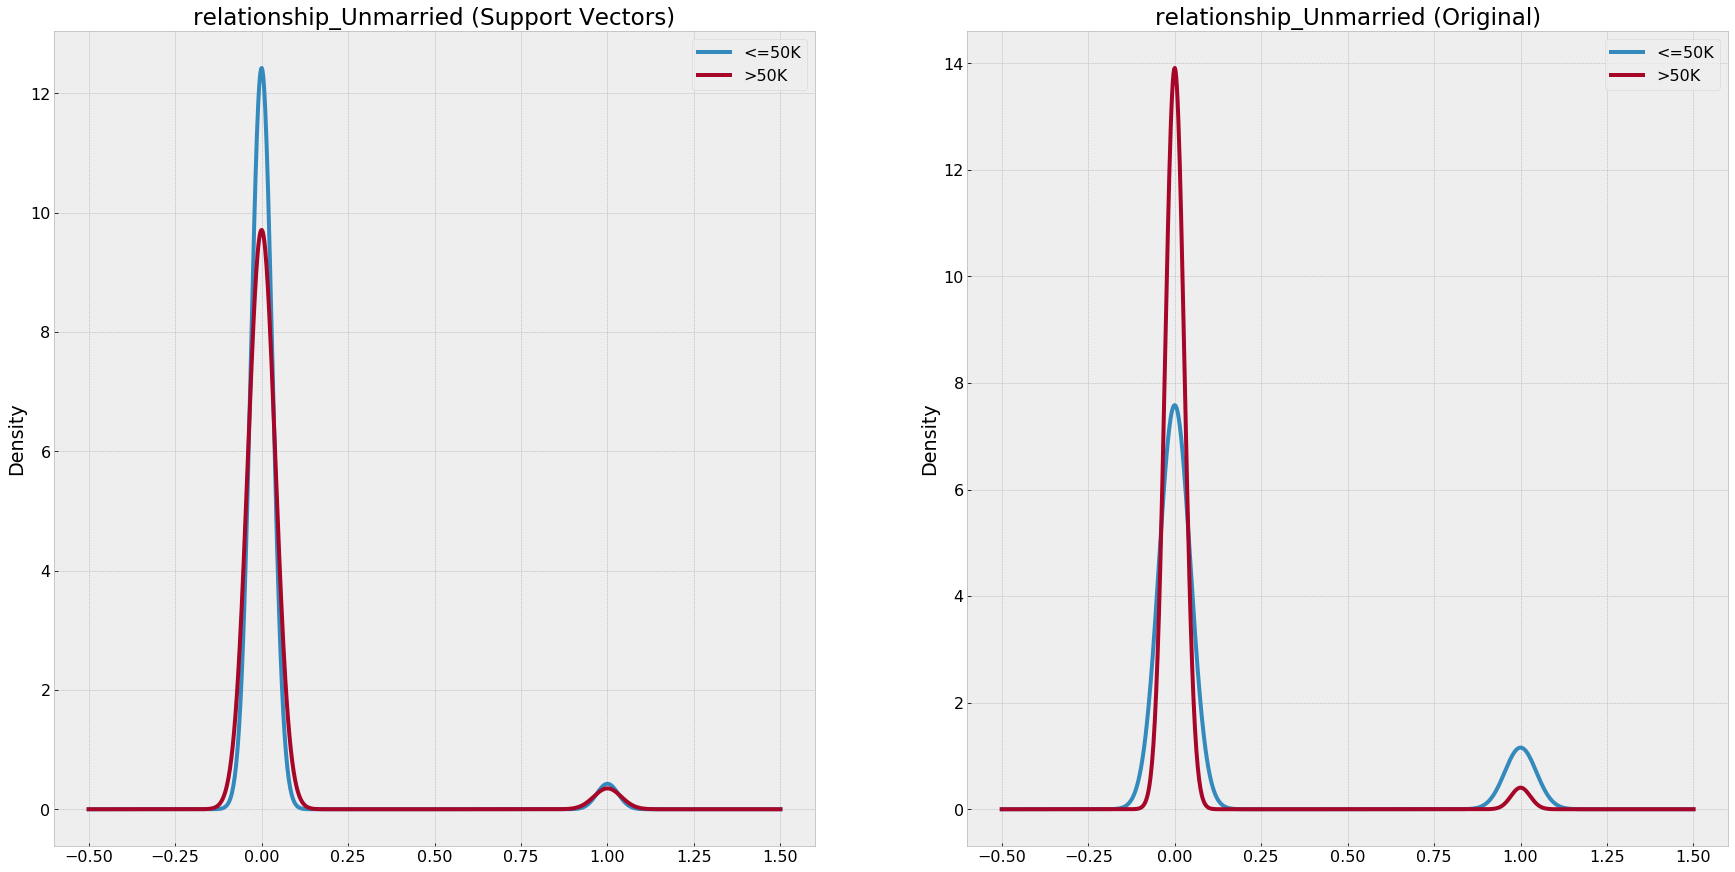

<Figure size 720x288 with 0 Axes>

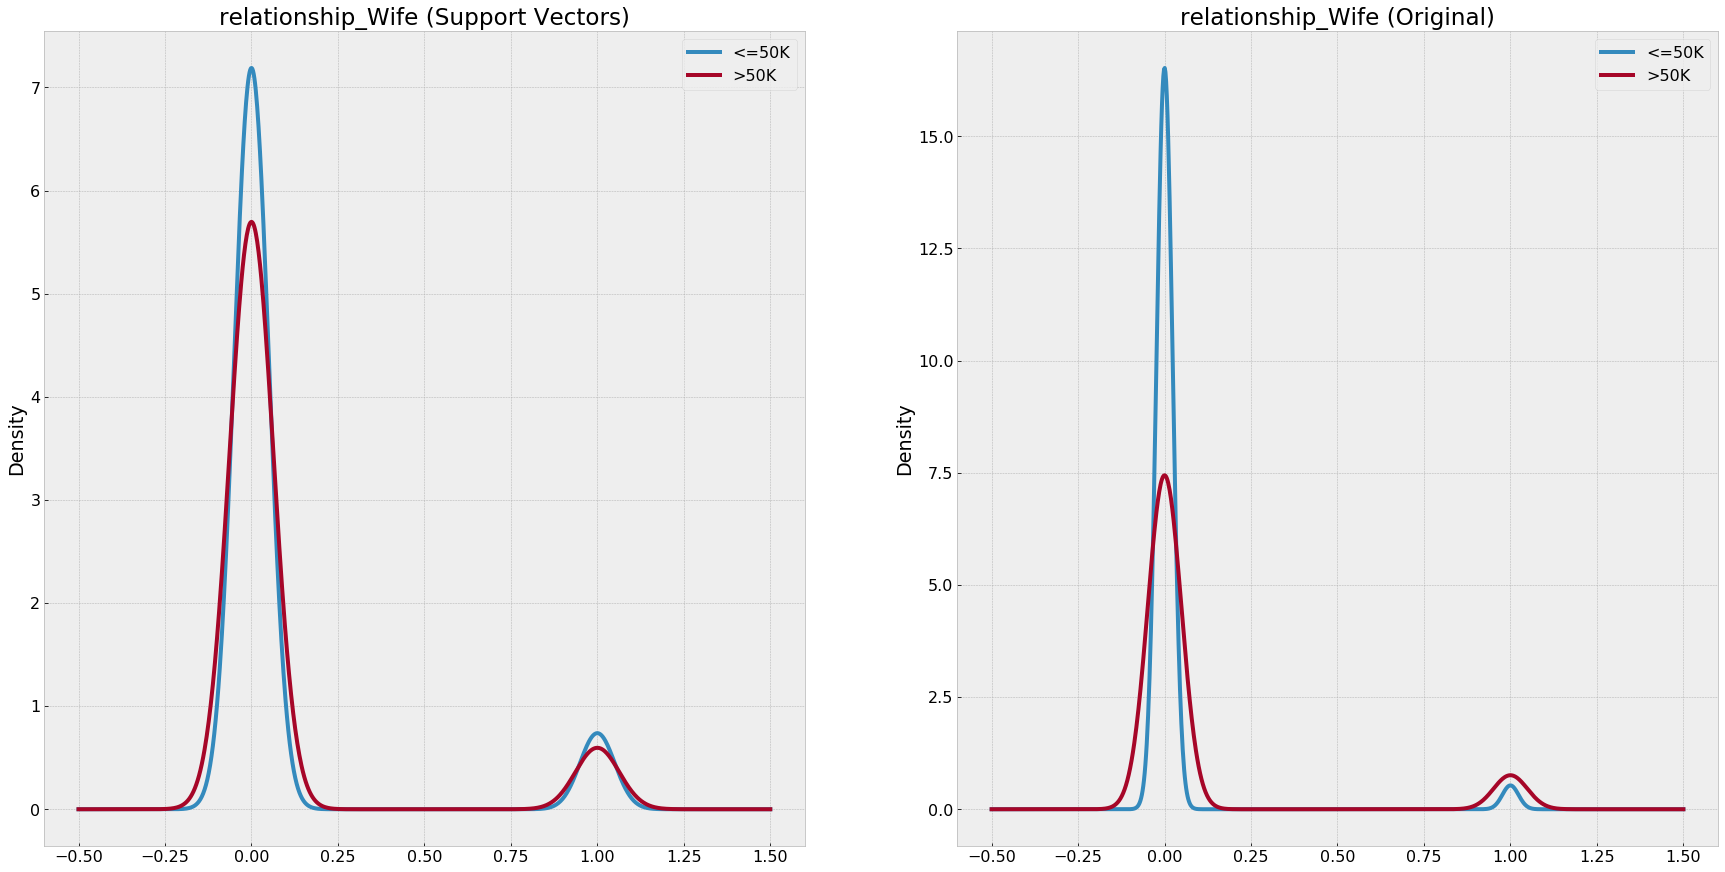

<Figure size 720x288 with 0 Axes>

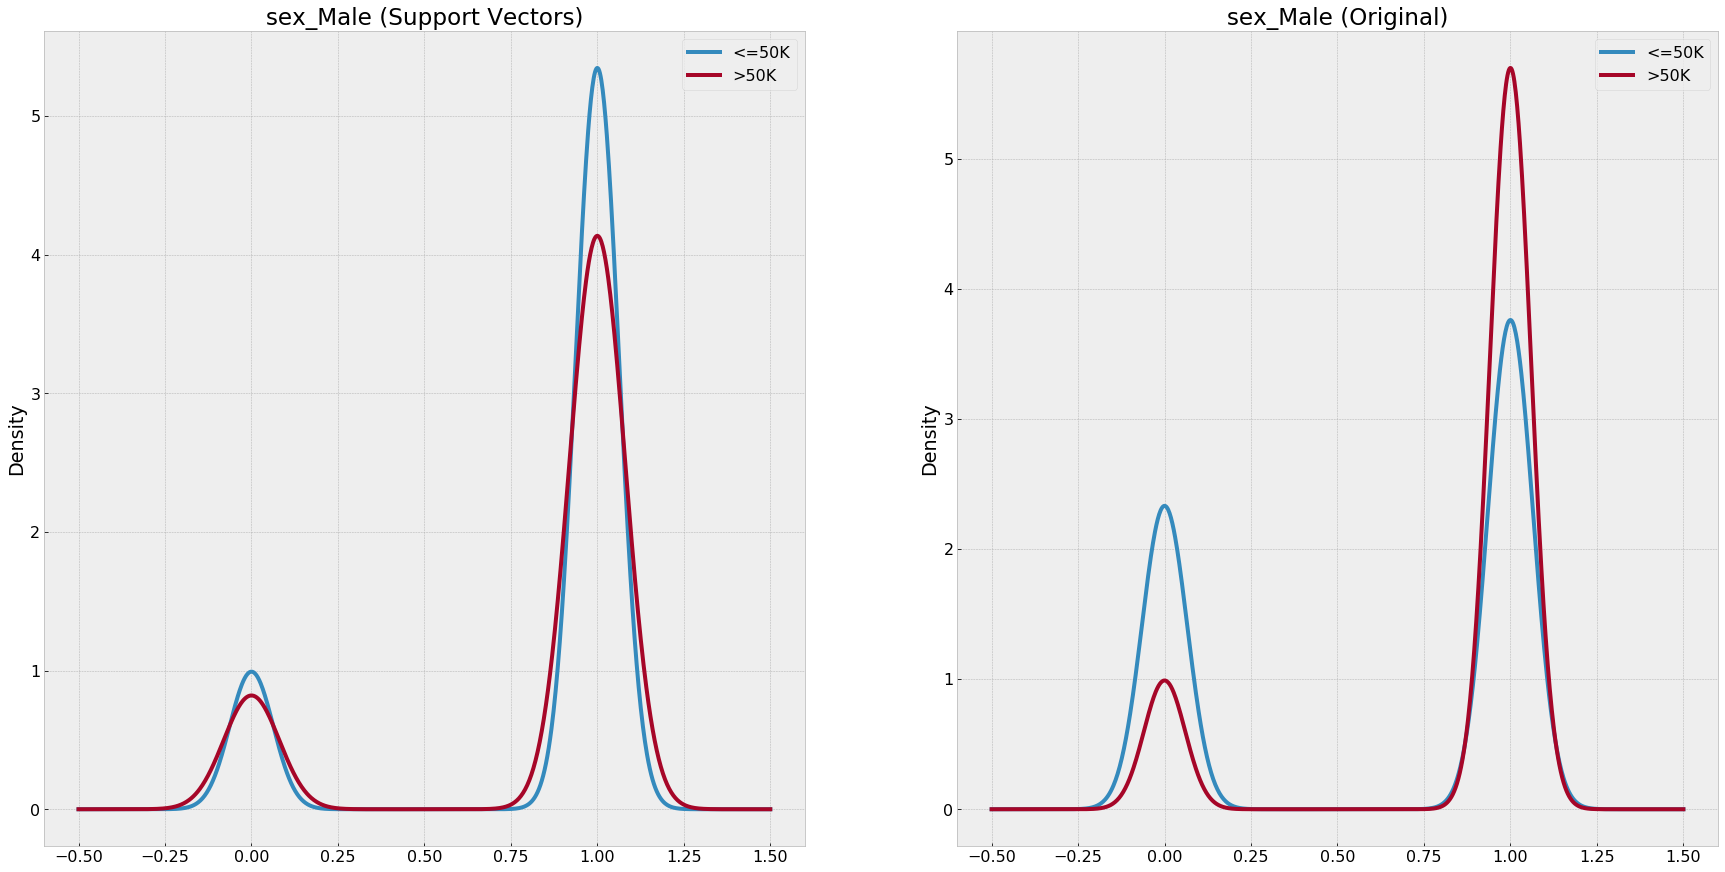

<Figure size 720x288 with 0 Axes>

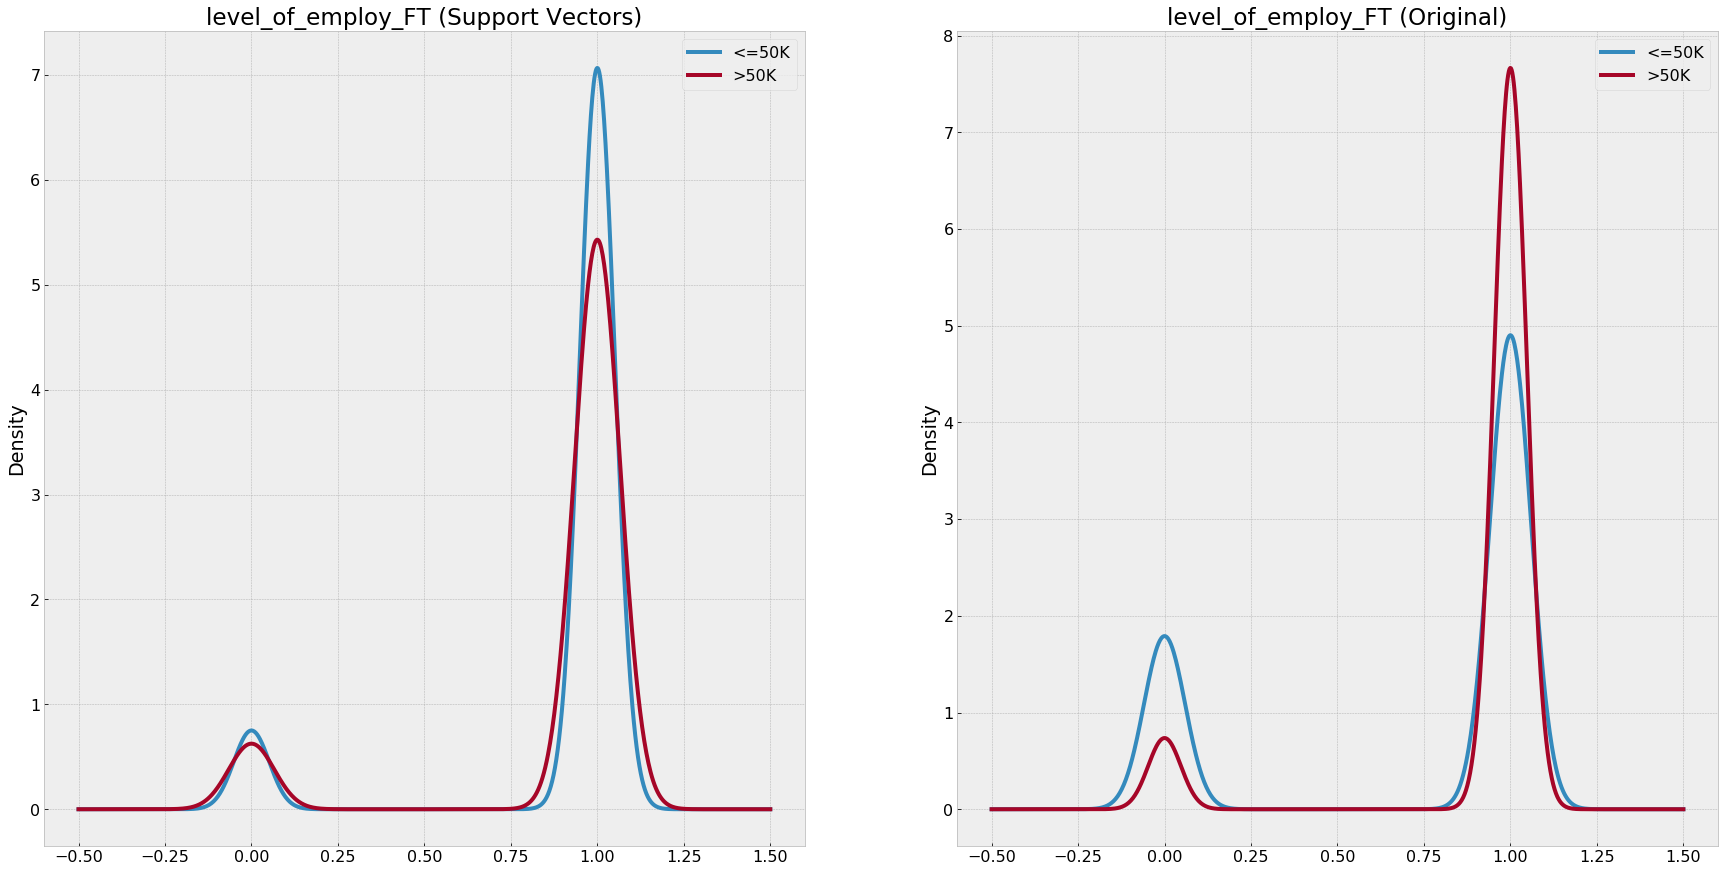

In [19]:
#https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['income_outcome'])
df_grouped = ml_df.groupby(['income_outcome'])

# plot KDE of Different variables
vars_to_plot = ['education_num_yr', 'cap_gain', 'age', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'level_of_employ_FT']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    plt.figure(figsize=(30,15))
    plt.rcParams.update({'font.size': 16,'lines.linewidth':4})
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Original)')

In [20]:
import time

t = time.process_time()

# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

elapsed_time = time.process_time() - t

print(elapsed_time)

accuracy: 0.8502078137988363
[[4235  299]
 [ 602  879]]
26.839990032999992


In [21]:
%%time

from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')


svm_sgd.fit(X_train_scaled,y_train)
yhat = svm_sgd.predict(X_test_scaled)
    
conf = mt.confusion_matrix(y_test,yhat)
acc = mt.accuracy_score(y_test,yhat)

print('SVM:', acc)
print('Confusion Matrix \n', conf)

SVM: 0.8415627597672486
Confusion Matrix 
 [[4274  260]
 [ 693  788]]
CPU times: user 67.8 ms, sys: 66 µs, total: 67.9 ms
Wall time: 48.2 ms


In [22]:
%%time

log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

log_sgd.fit(X_train_scaled,y_train)
yhat = log_sgd.predict(X_test_scaled)
    
conf = mt.confusion_matrix(y_test,yhat)
acc = mt.accuracy_score(y_test,yhat)

print('Logistic Regression:', acc)
print('Confusion Matrix \n', conf)

Logistic Regression: 0.8379052369077307
Confusion Matrix 
 [[4310  224]
 [ 751  730]]
CPU times: user 78.3 ms, sys: 4.02 ms, total: 82.3 ms
Wall time: 65.3 ms


Rubric Sections

50 PTS Create a logistic regression model and a support vector machine model for the
classification task involved with your dataset. Assess how well each model performs (use
80/20 training/testing split for your data). Adjust parameters of the models to make them more
accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel
only is fine to use.

10 PTS Discuss the advantages of each model for each classification task. Does one type
of model offer superior performance over another in terms of prediction accuracy? In terms of
training time or efficiency? Explain in detail.

30 PTS Use the weights from logistic regression to interpret the importance of different
features for each classification task. Explain your interpretation in detail. Why do you think
some variables are more important?

10 PTS Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain.